In [3]:
import base64
import json

In [25]:
data = base64.urlsafe_b64encode(json.dumps({'a': 123}).encode()).decode()

data2 = json.loads(base64.urlsafe_b64decode(data).decode())

data, data2


('eyJhIjogMTIzfQ==', {'a': 123})

In [16]:
type(bytearray(data))

bytearray

In [3]:
import cv2

In [ ]:
curl -X POST 'http://127.0.0.1:8081/models?url=http://filebrowser/files/mar_files/wf.war&batch_size=2&initial_workers=1&max_batch_delay=50'



In [ ]:
curl -X POST 'http://127.0.0.1:8081/workflows?url=http://filebrowser/files/mar_files/wf.war&batch_size=2&initial_workers=1&max_batch_delay=50'


In [ ]:
curl -X POST 'http://127.0.0.1:8081/models?url=http://filebrowser/files/mar_files/ocr.mar&batch_size=2&initial_workers=1&max_batch_delay=50'
curl -X POST 'http://127.0.0.1:8081/models?url=http://filebrowser/files/mar_files/detect.mar&batch_size=2&initial_workers=1&max_batch_delay=50'
curl -X POST 'http://127.0.0.1:8081/workflows?url=http://filebrowser/files/mar_files/wf.war&batch_size=2&initial_workers=1&max_batch_delay=50'



In [26]:
import matplotlib.pyplot as plt

# 1. Detection

In [27]:
import cv2
from ultralytics import YOLO

In [84]:
image = cv2.imread("../barcode01.jpg")

In [29]:
image.shape

(1333, 1000, 3)

In [30]:
model = YOLO("../weights/tscript/detect.torchscript", task="detect")

In [31]:
det_results = model(image)

Loading ../weights/tscript/detect.torchscript for TorchScript inference...

0: 640x640 1 barcode, 1857.1ms
Speed: 457.8ms preprocess, 1857.1ms inference, 387.5ms postprocess per image at shape (1, 3, 640, 640)


In [32]:
boxes = [[int(x) for x in box] for box in det_results[0].boxes.data.tolist()]

boxes

[[211, 477, 620, 776, 0, 0]]

In [33]:
boxes = [[
    int(x) for x in 
    [
      213.8890838623047,
      476.31890869140625,
      619.4435424804688,
      775.7311401367188,
    ]
]]

In [34]:
boxes[0]

[213, 476, 619, 775]

In [71]:
# ibox =0
# _=image[boxes[ibox][1]:boxes[ibox][3], boxes[ibox][0]:boxes[ibox][2],:]

In [72]:
# ibox = 0
# plt.imshow(image[boxes[ibox][1]:boxes[ibox][3], boxes[ibox][0]:boxes[ibox][2],:])

In [73]:
# plt.imshow(det_results[0].orig_img)

# 2. OCR

In [75]:
3, 299, 406

(3, 299, 406)

In [76]:
import torch as th

In [82]:
model2 = th.jit.load("../weights/tscript/ocr.pt")
_=model2.eval()

In [78]:
for box in boxes:
    pass

In [85]:
# plt.imshow(image[box[1]:box[3], box[0]:box[2],:])
box_image = image[box[1]:box[3], box[0]:box[2],:]

In [86]:
box_image = box_image / 255.0
box_image = th.FloatTensor(image).permute(2, 0, 1)
box_image.shape


torch.Size([3, 1333, 1000])

In [89]:
image2 = th.FloatTensor(cv2.imread("./barcode.png")/ 255.0).permute(2, 0, 1)

In [90]:
_=model2(image2.unsqueeze(0)).argmax(2).T.tolist()

In [91]:
image2.shape

torch.Size([3, 280, 523])

In [62]:
box_image.shape

torch.Size([3, 1333, 1000])

In [52]:
# box_image_2 = th.rand(3, 299, 406)
box_image_2 = th.rand(3, 1000, 1000)

In [54]:
from torchvision.transforms import Resize

In [92]:
resize = Resize(size=(280, 523))

In [93]:
resize(box_image_2).shape

/home/fatuus/deepschool-cvr-tserve/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 280, 523])

In [94]:
model2(resize(box_image_2).unsqueeze(0)).argmax(2).T.tolist()

[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]

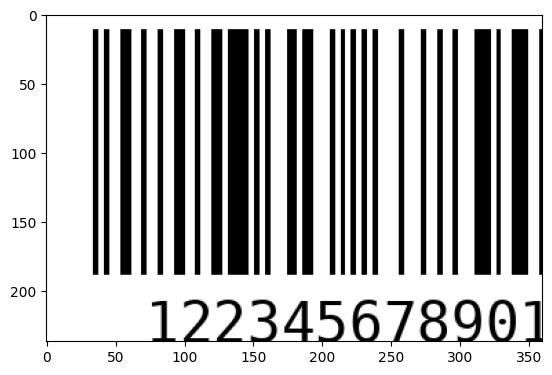

In [48]:
plt.imshow(image[box[1]:box[3], box[0]:box[2],:])